In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/tennis.csv')
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [8]:
X = df.drop(['play'],axis=1)
X

,outlook,temp,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [6]:
y = df.play
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['outlook_new'] = lb.fit_transform(df['outlook'])
X['temp_new'] = lb.fit_transform(df['temp'])
X['humidity_new'] = lb.fit_transform(df['humidity'])
X['windy_new'] = lb.fit_transform(df['windy'])
X

,outlook,temp,humidity,windy,outlook_new,temp_new,humidity_new,windy_new
0,sunny,hot,high,False,2,1,0,0
1,sunny,hot,high,True,2,1,0,1
2,overcast,hot,high,False,0,1,0,0
3,rainy,mild,high,False,1,2,0,0
4,rainy,cool,normal,False,1,0,1,0
5,rainy,cool,normal,True,1,0,1,1
6,overcast,cool,normal,True,0,0,1,1
7,sunny,mild,high,False,2,2,0,0
8,sunny,cool,normal,False,2,0,1,0
9,rainy,mild,normal,False,1,2,1,0


In [19]:
X_new = X.drop(['outlook','temp','humidity','windy'],axis=1)
X_new


,outlook_new,temp_new,humidity_new,windy_new
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2)

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [28]:
model.predict(X_test)

array(['yes', 'yes', 'no'], dtype='<U3')

In [26]:
y_test

2    yes
4    yes
3    yes
Name: play, dtype: object

In [31]:
model.score(X_train,y_train).round(2)

0.91

In [32]:
y_pred = model.predict(X_test)
y_pred

array(['yes', 'yes', 'no'], dtype='<U3')

E:\Drive\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Drive\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Drive\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.00      0.00      0.00         0
         yes       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



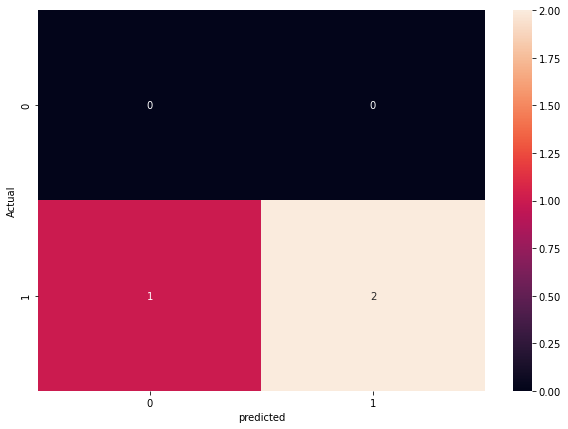

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
cr = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Actual")

print(cr)